<p style="color:black;background-color:#FFD700;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px dotted blue;font-size:22px"> 🦉DATA VISUALIZATION & TITANIC SURVIVAL CLASSIFICATION 🦉<span style='font-size:28px; background-color:blue '></span></p>
<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg" width='500' style='border-radius:30px'>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>1 | Introduction </b></h2>

<h3 style="padding: 8px;color:#C71585"><b>✨ Data Description 📁</b></h3>

In this work we will use a dataset of 891 pessengers that include the following attributes:

* **PessengerID**-Unique ID assigned to the pessenger.
* **Survived**-Survived pessengers (1: Survived, 0: Died).
* **Pclass**-Age of the customer
* **Name**-Name of the pessengers.
* **Sex**-Sex of pessengers (Male or Female).
* **Age**-Age of the pessenger.
* **SibSp**-Number of siblings.
* **Parch**-Number of parents.
* **Ticket**-Ticket number.
* **Fare**-Passenger fare.
* **Cabin**-Cabin number.
* **Embarked**Port of embarkation (C: Cherbourg, Q: Queenstown, S: Southampton).

<h3 style="padding: 8px;color:#C71585"><b>✨ Tasks and notebook goal 🔮</b></h3>

The aim of this work, is to takle the following things:

* **Install and import the necessary libraries**
* **Load the data-set into DataFrame**
* **Visualisation the data to retrived the useful information**
* **Data pre-processing for Classification**
* **Training the Logistic Regression Model**
* **The metrics used to evaluate the performance of a Logistic Regression model**
* **Save the model into pickle file**

Before we get started, let's see some usefull definitions that are used in this notebook.

<h3 style="padding: 8px;color:#C71585"><b>✨ Usefull definitions used in this notebook 🎈</b></h3>

### **What is Titanic Classification?**

Titanic classification is a popular machine learning problem where the goal is to predict whether a passenger on the Titanic survived or perished. By analyzing various features such as age, gender, class, and ticket fare, models can be trained to identify patterns that correlate with survival. This task is a classic example of binary classification, where the outcome is either "survived" or "perished."

### **Logistic Regression**

Logistic Regression is a statical model used to predict the probability of an event occurring. It is particularly suitable for binary classification problems, where the outcomes is either 0 or 1. In the context of Titanic dataset, logistic regression can be used to predict the probability of a pessengers surviving based on their attributes. The model astimates a logistic function that map the input features to a probability between 0 and 1, allowing for a probabilistic prediction of survival.

<center><img src="https://www.voxco.com/wp-content/uploads/2021/11/LOGISTIC-REGRESSION.jpg" width='300'></center>

### **Accuracy Score**

Accuracy score is a common metric used to evaluate the performance of classification models. It measures the proportion of correct predictions made by the model. In other words, it indicates how often the model's predictions match the actual values. A higher accuracy score generally indicates better model performance, but it's important to consider other metrics like precision, recall, and F1-score.

<center><img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b1fd_644af4d67e9765a3455cf298_classification_guide_apc02.png" width='300'></center>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>2 | Import Necessary Librairies </b></h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>3 | Data Collection </b></h2>

In [3]:
titanic_data = pd.read_csv('Dataset/titanic.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.columns          # Checking the columns in a data-set.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>4 | Data Preprocessing </b></h2>

In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()        # Checking the null or missing values in a data-set.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Note:** In the data-set three columns have the null or missing values. That is 'Age', 'Cabin' and 'Embarked'.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h4 style="padding: 8px;color:white"><b>4.1 | Handle the Missing Values </b></h4>

In [9]:
# Replacing the missing values in 'Age' column with mean.
titanic_data['Age'].fillna(titanic_data.Age.mean(), inplace = True)

In [10]:
# Drop the 'Cabin' column from the datafram.
titanic_data = titanic_data.drop('Cabin', axis = 1)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [11]:
print(titanic_data.Embarked.mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(titanic_data.Embarked.mode()[0])

S


In [13]:
titanic_data['Embarked'].fillna(titanic_data.Embarked.mode()[0], inplace = True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>5 | Data Analysis </b></h2>

In [15]:
# Geting the statical measures about the data.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Finding the number of people survived and not survived.
titanic_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<p>1 - Survived </p>
<p>0 - Died</p>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>6 | Data Visualization </b></h2>

In [17]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

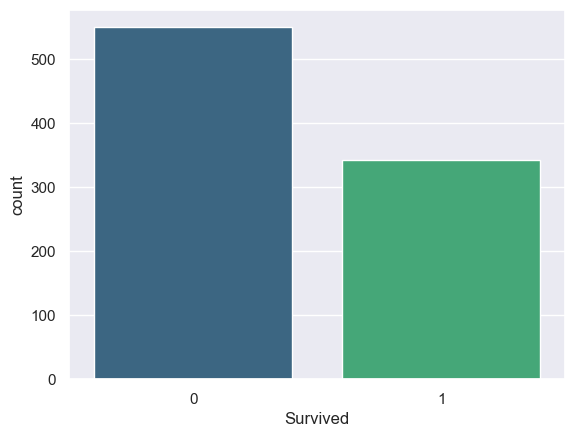

In [18]:
sns.countplot(x = 'Survived', data = titanic_data, palette='viridis')

In [19]:
titanic_data.Sex.value_counts()      # Checking the total males and females in a data-set.

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

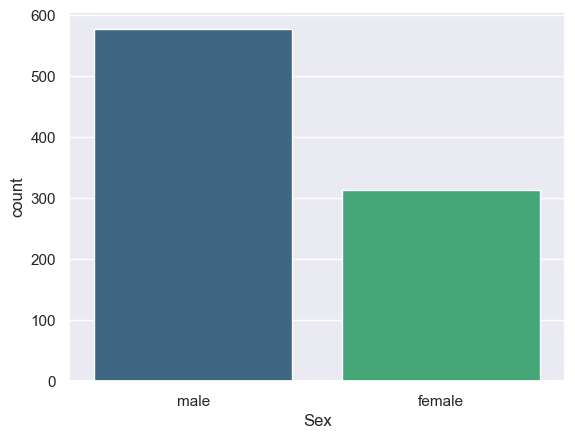

In [20]:
sns.countplot(x = 'Sex', data = titanic_data, palette='viridis')

<Axes: xlabel='Sex', ylabel='count'>

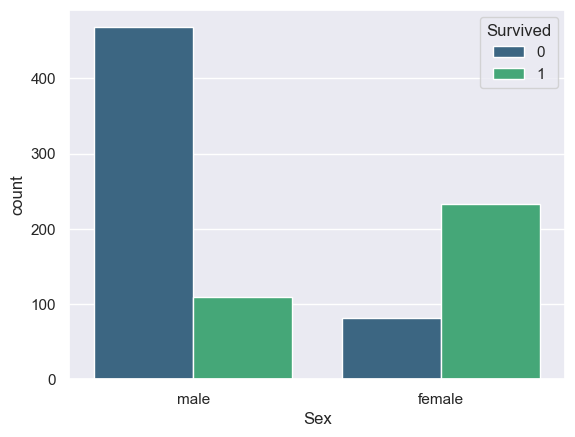

In [21]:
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_data, palette='viridis')

<Axes: xlabel='Pclass', ylabel='count'>

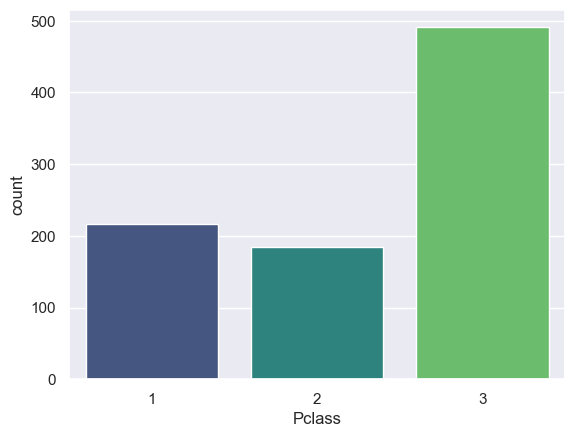

In [22]:
sns.countplot(x = 'Pclass', data = titanic_data, palette='viridis')

<Axes: xlabel='Pclass', ylabel='count'>

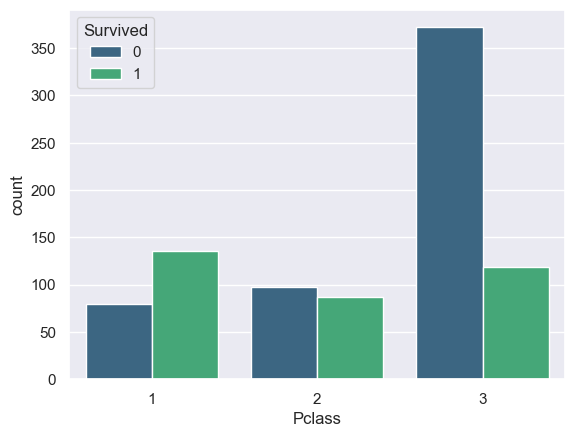

In [23]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data, palette='viridis')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>7 | Encoding the Categoricat Columns  </b></h2>

In [24]:
titanic_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
titanic_data.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [26]:
# Converting the Categorical columns
titanic_data.replace({'Sex' : {'male': 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>8 | Future Selection  </b></h2>

In [28]:
X = titanic_data.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
Y = titanic_data['Survived']

In [29]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [30]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>9 | Train Test Split  </b></h2>

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>10 | Model Training  </b></h2>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>10.1 | Logistic Regression  </b></h3>

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
model_prediction = model.predict(X_test)

In [40]:
model_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [41]:
accuracy_score(model_prediction, Y_test)

0.7821229050279329

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>11 | Model Evaluation  </b></h2>

In [41]:
confusion_matrix(Y_test, model_prediction)

array([[91,  9],
       [30, 49]], dtype=int64)

In [42]:
results = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': [0.78]
})

results

,Model,Score
0,Logistic Regression,0.78


<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h2 style="padding: 8px;color:white"><b>12 | Model Building and Deployment </b></h2>

In [43]:
# To save the model in a pkl file. 

import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))

In [44]:
a = np.array([3,0,22.0,1,0,7.2500,0])
p = model.predict(a.reshape(-1,7))

In [45]:
p

array([0], dtype=int64)

In [46]:
p[0]

0